In [4]:
import pandas as pd
df = pd.read_csv('states/Assam.csv')
dis = df['District'].unique()

print(dis)

['Bongaigaon' 'Karbi Anglong' 'Nalbari' 'Chirang' 'Golaghat' 'Lakhimpur'
 'Marigaon' 'Dima Hasao' 'Dhubri' 'Dhemaji' 'Kamrup Metro' 'Sonitpur'
 'Udalguri' 'Goalpara' 'Charaideo' 'Kokrajhar' 'Dibrugarh' 'Barpeta'
 'Hojai' 'Baksa' 'Jorhat' 'Cachar' 'Hailakandi' 'Darrang' 'Biswanath'
 'West Karbi Anglong' 'Sivasagar' 'Majuli' 'Tinsukia' 'Kamrup' 'Karimganj'
 'Nagaon' 'South Salmara Mancachar' 'Sibsagar' 'South Salmara Mankachar'
 'Kamrup Rural']


Yearly Comparision for Districts

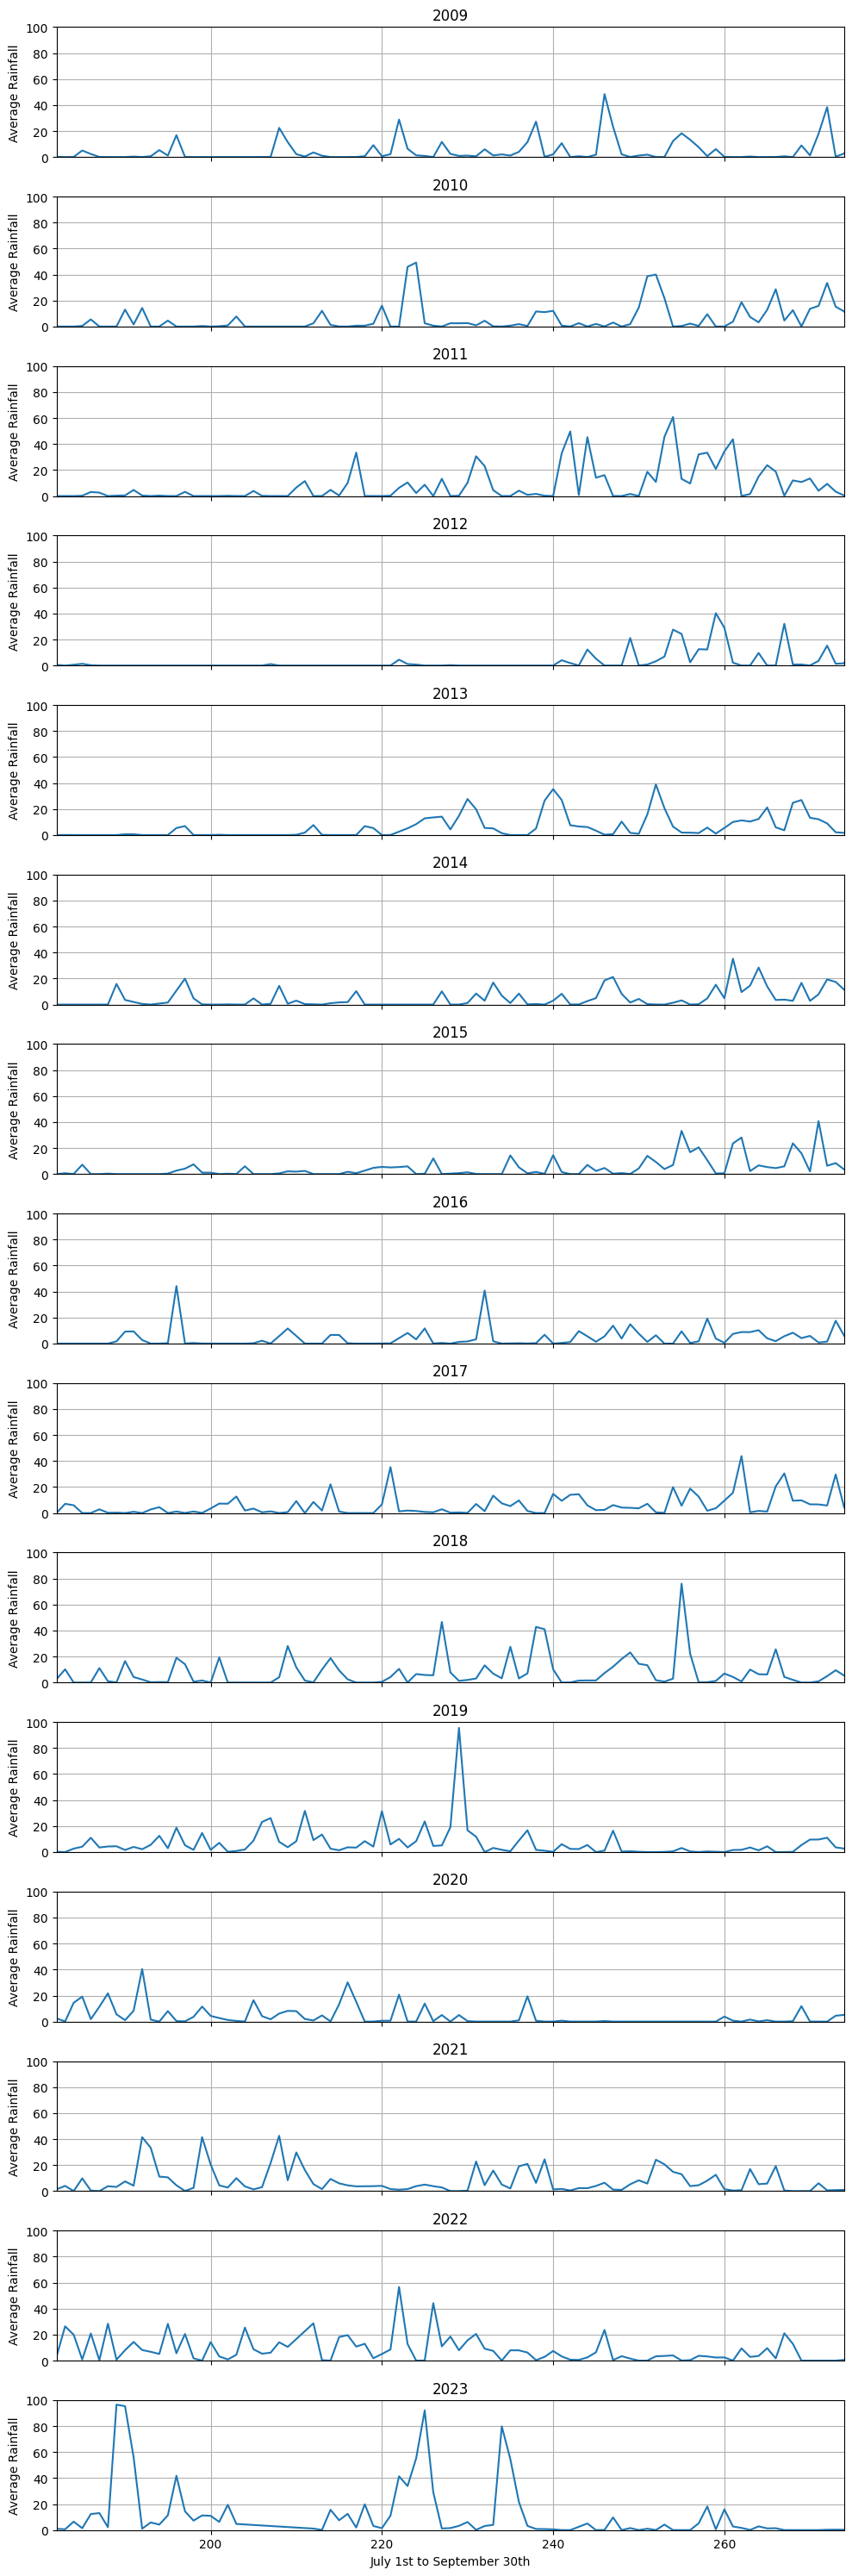

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('districts/Mandi.csv',parse_dates= True)
data = data.sort_values(by="Date", ascending=True)


# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate days since January 1st
data['Days_since_jan1'] = (data['Date'] - pd.to_datetime(data['Year'], format='%Y')) / pd.Timedelta(days=1)

# Group by 'Year' and 'Days_since_jan1' and calculate average rainfall
avg_rainfall_by_year_day = data.groupby(['Year', 'Days_since_jan1'])['Avg_rainfall'].mean().reset_index()

# Get unique years
years = avg_rainfall_by_year_day['Year'].unique()

# Plotting
fig, axes = plt.subplots(len(years), 1, figsize=(10, 2*len(years)), sharex=True)

for i, year in enumerate(years):
    ax = axes[i]
    data_year = avg_rainfall_by_year_day[avg_rainfall_by_year_day['Year'] == year]
    ax.plot(data_year['Days_since_jan1'], data_year['Avg_rainfall'], linestyle='-', label=f'Year {year}')
    ax.set_title(f'{year}')
    ax.set_ylabel('Average Rainfall')
    ax.set_ylim(0,100)
    ax.set_xlim(left=182)
    ax.set_xlim(right=274)
    ax.grid(True)
ax.set_xlabel('July 1st to September 30th')
plt.tight_layout()
plt.show()



Yearly Comparision for States

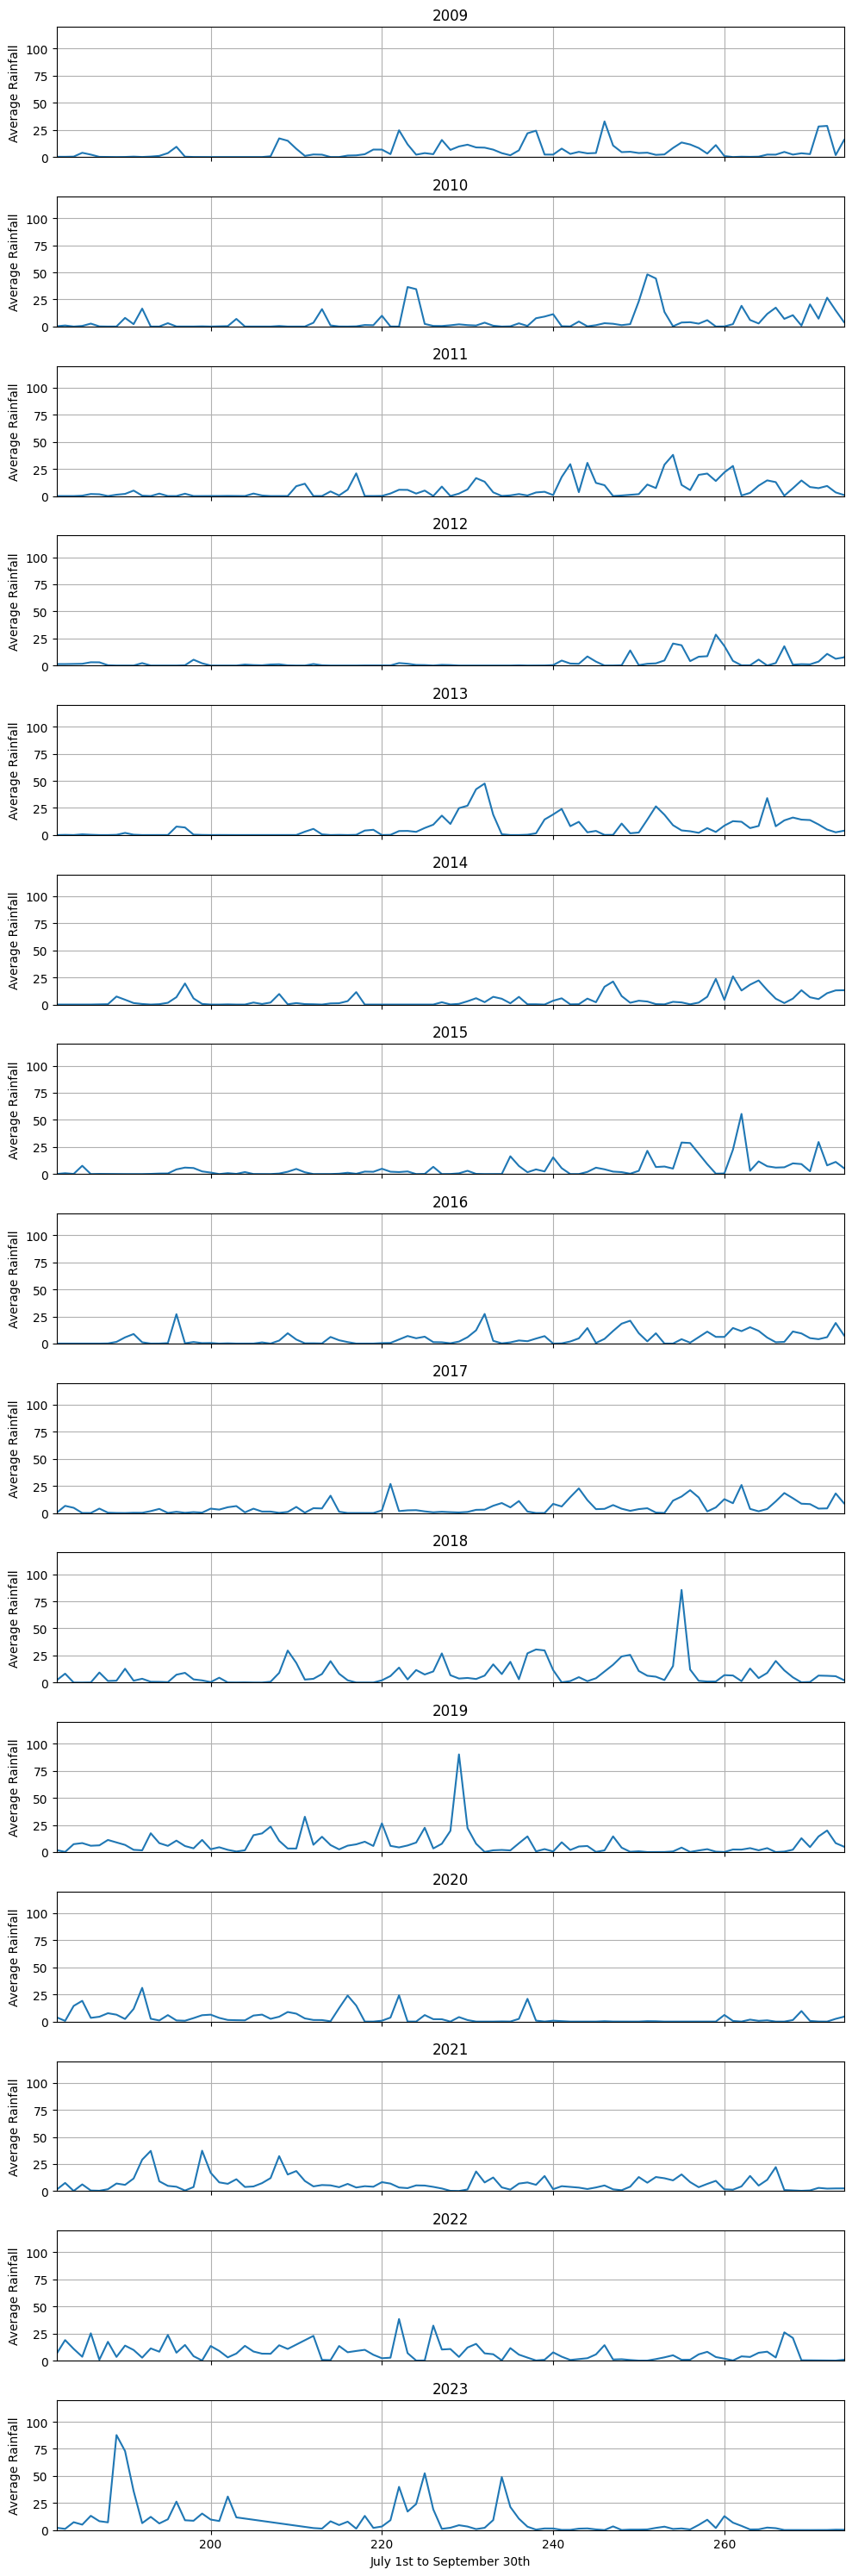

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("states_avg/Himachal Pradesh.csv")

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate days since January 1st
data['Days_since_jan1'] = (data['Date'] - pd.to_datetime(data['Year'], format='%Y')) / pd.Timedelta(days=1)



# Get unique years
years = data['Year'].unique()

# Plotting
fig, axes = plt.subplots(len(years), 1, figsize=(10, 2*len(years)), sharex=True)

for i, year in enumerate(years):
    ax = axes[i]
    data_year = data[data['Year'] == year]
    ax.plot(data_year['Days_since_jan1'], data_year['Average'], linestyle='-', label=f'Year {year}')
    ax.set_title(f'{year}')
    ax.set_ylabel('Average Rainfall')
    ax.set_ylim(0,120)
    ax.set_xlim(left=182)
    ax.set_xlim(right=274)
    ax.grid(True)

# ax.set_title('Himachal Pradesh')
ax.set_xlabel('July 1st to September 30th')
plt.tight_layout()
plt.show()



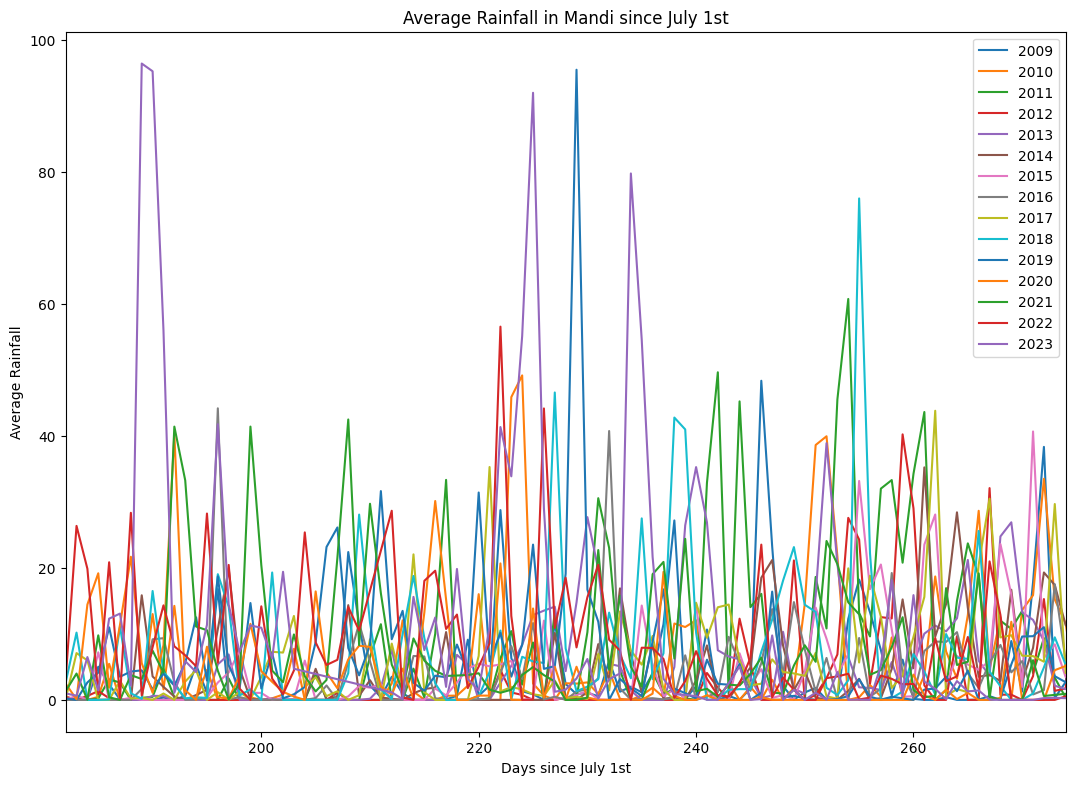

In [56]:

import pandas as pd
import matplotlib.pyplot as plt

def get_days_since_jan1(date):
    return date.timetuple().tm_yday - 1

# Read the CSV file into a DataFrame


df = pd.read_csv('districts/Mandi.csv',parse_dates= True)
df = df.sort_values(by="Date", ascending=True)
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate days since January 1st for each date
df['days_since_jan1'] = df['Date'].apply(get_days_since_jan1)

# Group the data by 'Year'
grouped_data = df.groupby('Year')

# Create a list of tuples for each year
yearly_data = [(year, group[['days_since_jan1', 'Avg_rainfall']]) for year, group in grouped_data]

# Print the yearly data
# print(yearly_data)

#Plotting the Data by Year
fig = plt.figure(figsize = (10.0, 7.0), dpi=100)
ax = fig.add_axes([0,0,1,1])

for year, group in yearly_data:
    days = group['days_since_jan1'].to_list()
    rainfall = group['Avg_rainfall'].to_list()
    ax.plot(days, rainfall, label=year)

ax.set_xlabel('Days since July 1st')
ax.set_ylabel('Average Rainfall')
ax.set_title('Average Rainfall in Mandi since July 1st')
ax.set_xlim(left=182)
ax.set_xlim(right=274)

ax.legend()

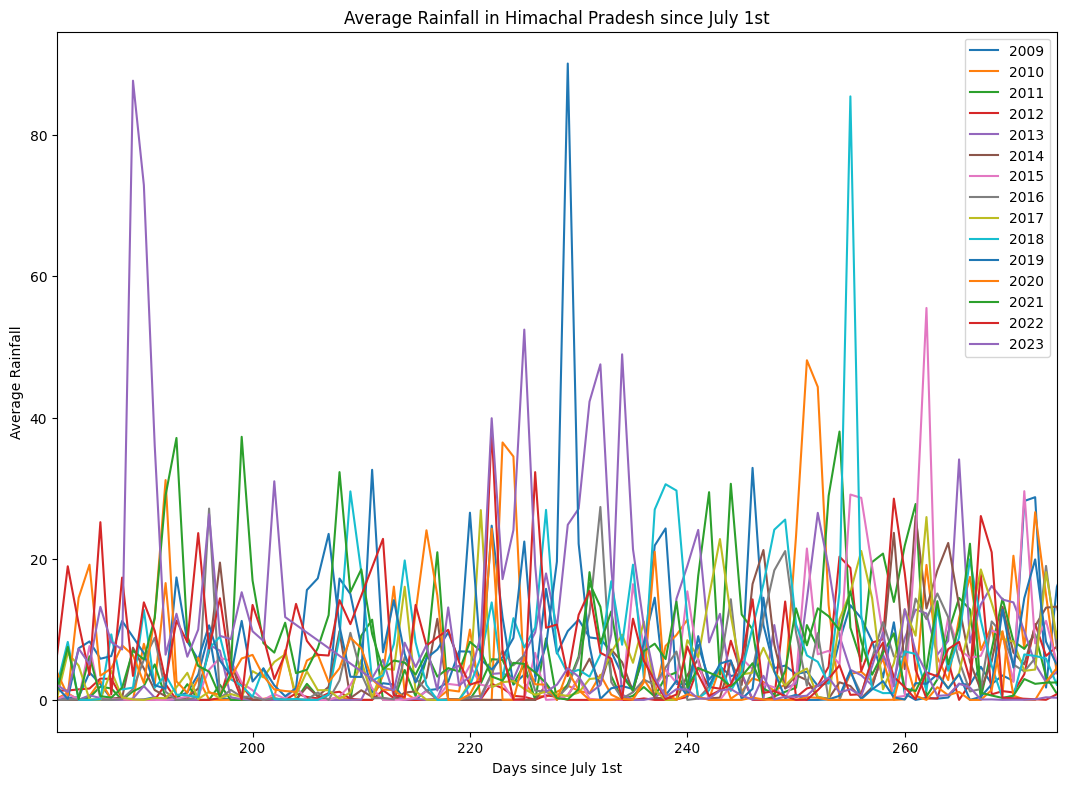

In [57]:

import pandas as pd
import matplotlib.pyplot as plt

def get_days_since_jan1(date):
    return date.timetuple().tm_yday - 1

# Read the CSV file into a DataFrame
df = pd.read_csv('states_avg/Himachal Pradesh.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate days since January 1st for each date
df['days_since_jan1'] = df['Date'].apply(get_days_since_jan1)

# Group the data by 'Year'
grouped_data = df.groupby('Year')

# Create a list of tuples for each year
yearly_data = [(year, group[['days_since_jan1', 'Average']]) for year, group in grouped_data]

# Print the yearly data
# print(yearly_data)

#Plotting the Data by Year
fig = plt.figure(figsize = (10.0, 7.0), dpi=100)
ax = fig.add_axes([0,0,1,1])

for year, group in yearly_data:
    days = group['days_since_jan1'].to_list()
    rainfall = group['Average'].to_list()
    ax.plot(days, rainfall, label=year)

ax.set_xlabel('Days since July 1st')
ax.set_ylabel('Average Rainfall')
ax.set_title('Average Rainfall in Himachal Pradesh since July 1st')
ax.set_xlim(left=182)
ax.set_xlim(right=274)

ax.legend()

Total Rainfall

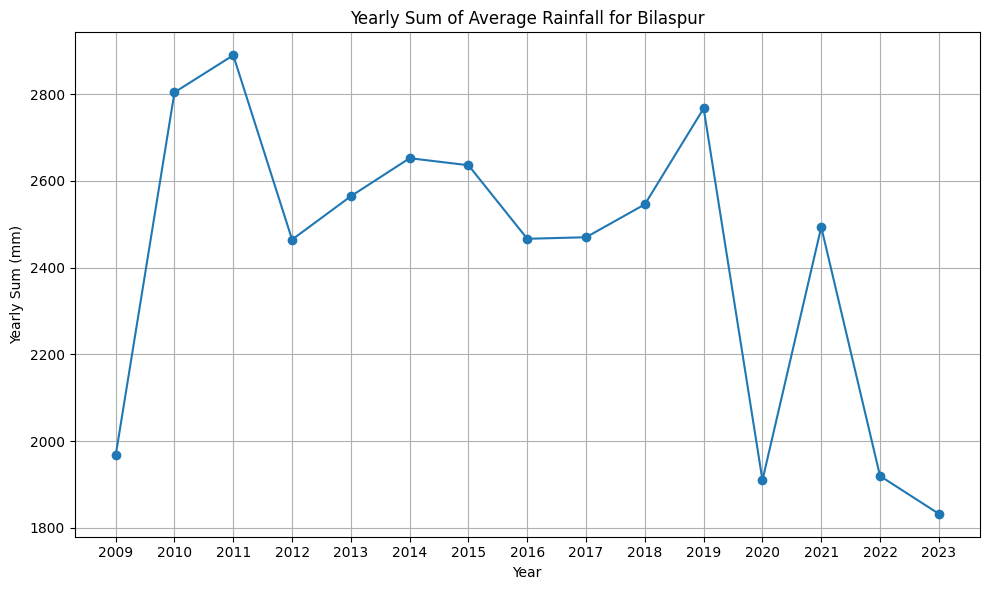

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('districts/Bilaspur.csv',parse_dates= True)
data = data.sort_values(by="Date", ascending=True)

years = data['Year'].unique()

yearly_sum = data.groupby('Year')['Avg_rainfall'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum.index, yearly_sum.values, marker='o', linestyle='-')
plt.title('Yearly Sum of Average Rainfall for Bilaspur')
plt.xlabel('Year')
plt.ylabel('Yearly Sum (mm)')
plt.grid(True)
plt.xticks(yearly_sum.index)  # Set x-axis ticks to be the years
plt.tight_layout()
plt.show()


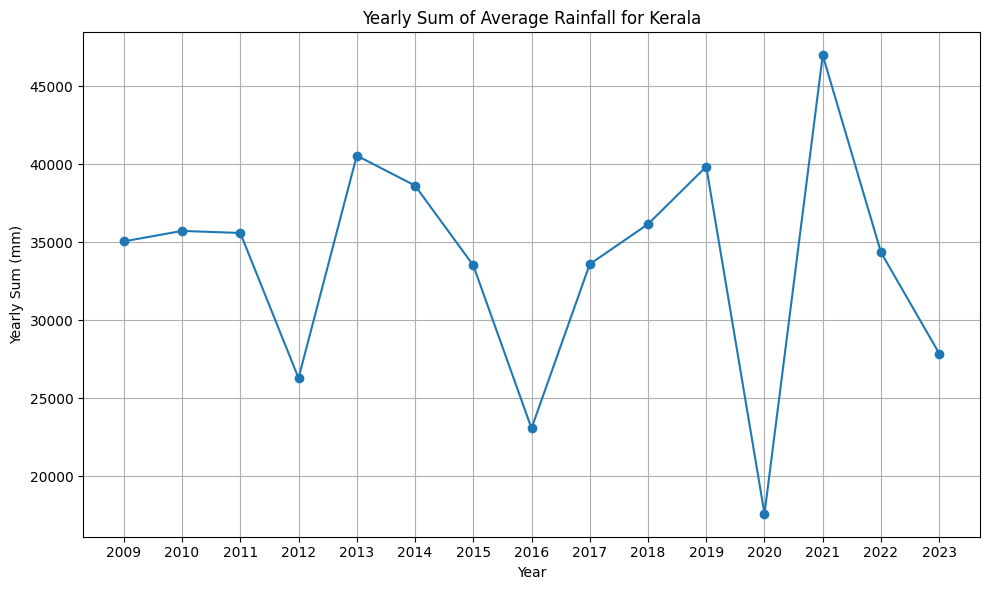

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv('states/Kerala.csv',parse_dates= True)
data = data.sort_values(by="Date", ascending=True)

years = data['Year'].unique()

yearly_sum = data.groupby('Year')['Avg_rainfall'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_sum.index, yearly_sum.values, marker='o', linestyle='-')
plt.title('Yearly Sum of Average Rainfall for Kerala')
plt.xlabel('Year')
plt.ylabel('Yearly Sum (mm)')
plt.grid(True)
plt.xticks(yearly_sum.index)  # Set x-axis ticks to be the years
plt.tight_layout()
plt.show()
